# High-Resolution STEM Image Analysis

## Purpose
This notebook is designed to analyze high-resolution Scanning Transmission Electron Microscopy (STEM) images. The steps include applying noise, filtering, atomic column localization, and quantification of the intensity of these columns using a double Gaussian with a Bayesian framework. An analytical expression for the Maximum A Posteriori (MAP) rule is derived and tested to retrieve the correct number of atomic columns present in experimental STEM data.

## What You Will Learn
- **Noise Application and Filtering**: Techniques to add and filter noise in high-resolution STEM images.
- **Atomic Column Localization**: Methods to detect and localize atomic columns.
- **Intensity Quantification Using Double Gaussian**: Fitting a double Gaussian model to atomic column intensities.
- **Bayesian Framework and MAP Rule**: Applying a Bayesian framework to quantify atomic columns and derive the MAP rule.

By the end of this notebook, you will be familiar with advanced techniques for analyzing high-resolution STEM images.

STEM Image credit: https://github.com/pycroscopy/CNMS_UM_2018_SPIMA/blob/master/data/LLTO_800.tif

*Notebook created by Roberto dos Reis -- roberto.reis@northwestern.edu -- @2024*

### 1. Loading and Displaying the High-Resolution STEM Image


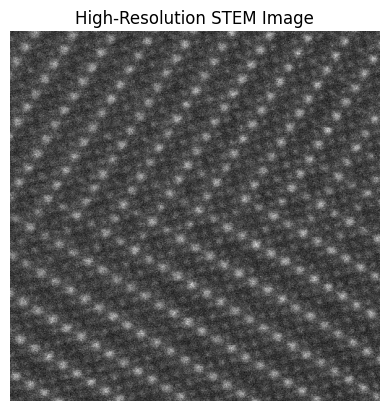

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

# Load a high-resolution STEM image
image_path = 'images/LLTO_800.tif' # Change this to the path of your microscopy image
stem_image = io.imread(image_path)

# Display the image
plt.imshow(stem_image, cmap='gray')
plt.title('High-Resolution STEM Image')
plt.axis('off')  # Hide axes ticks
plt.show()


### Applying Noise and Filtering

In this section, we will add synthetic noise to the high-resolution STEM image and then apply filtering techniques to reduce the noise. This process helps simulate real-world conditions where images often contain noise due to various factors.


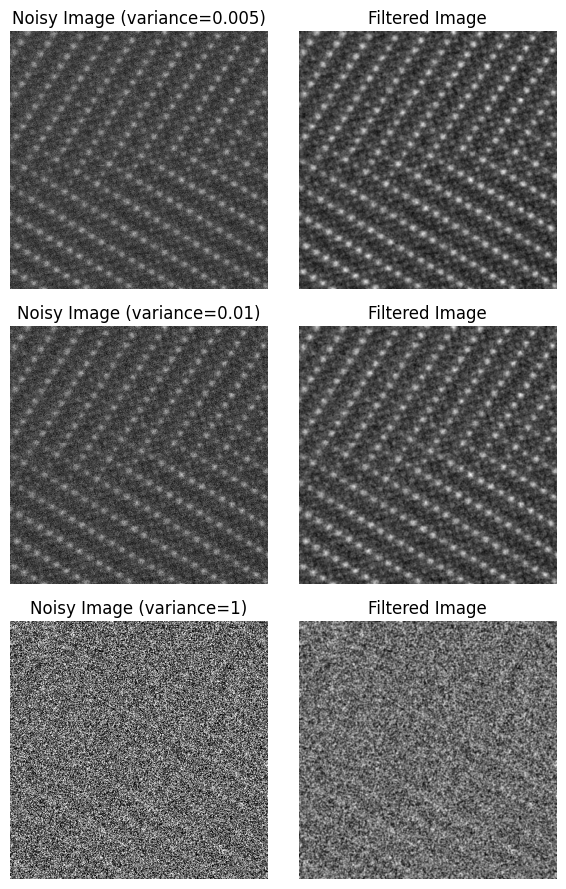

In [9]:
from skimage.util import random_noise
from skimage.filters import gaussian

# Define noise levels
noise_levels = [0.005, 0.01, 1]  # Different variance levels for Gaussian noise

# Apply synthetic noise to the image at different levels
noisy_images = [random_noise(stem_image, mode='gaussian', var=var) for var in noise_levels]

# Filter the noisy images using a Gaussian filter
filtered_images = [gaussian(noisy_image, sigma=1) for noisy_image in noisy_images]

# Display the noisy and filtered images side by side for each noise level
fig, axs = plt.subplots(len(noise_levels), 2, figsize=(6, 3 * len(noise_levels)))

for i, (noisy_image, filtered_image, var) in enumerate(zip(noisy_images, filtered_images, noise_levels)):
    # Noisy Image
    axs[i, 0].imshow(noisy_image, cmap='gray')
    axs[i, 0].set_title(f'Noisy Image (variance={var})')
    axs[i, 0].axis('off')

    # Filtered Image
    axs[i, 1].imshow(filtered_image, cmap='gray')
    axs[i, 1].set_title('Filtered Image')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


### Fourier Space Comparison

To better understand the effects of noise and filtering, we will compare the noisy and filtered images in the Fourier space using FFT. This analysis will help us visualize how noise and filtering impact the frequency components of the images.


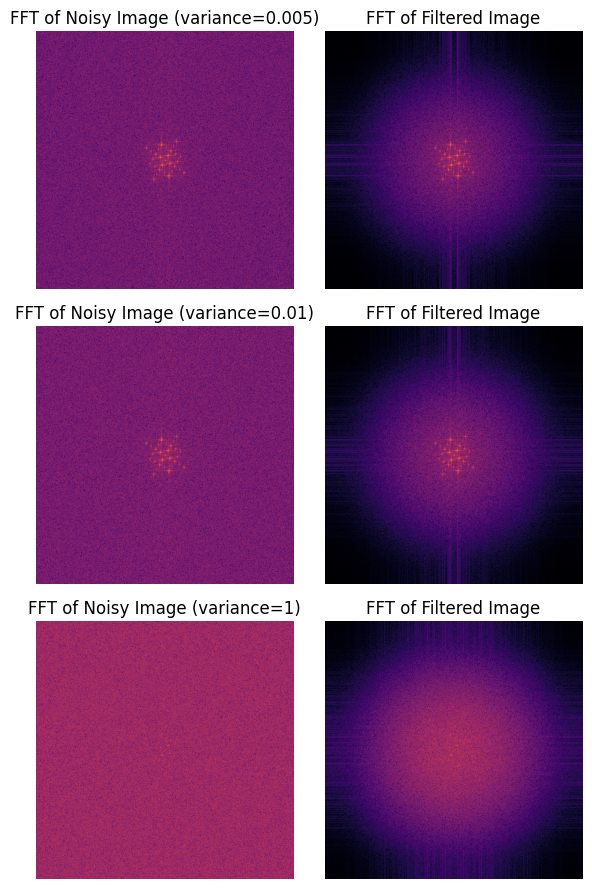

In [12]:
from scipy.fftpack import fft2, fftshift

# Function to compute and plot FFT
def plot_fft(image, ax, title):
    fft_image = fftshift(fft2(image))
    magnitude_spectrum = np.log(np.abs(fft_image) + 1)
    ax.imshow(magnitude_spectrum, cmap='inferno')
    ax.set_title(title)
    ax.axis('off')

# Display the FFT of noisy and filtered images side by side for each noise level
fig, axs = plt.subplots(len(noise_levels), 2, figsize=(6, 3 * len(noise_levels)))

for i, (noisy_image, filtered_image, var) in enumerate(zip(noisy_images, filtered_images, noise_levels)):
    # FFT of Noisy Image
    plot_fft(noisy_image, axs[i, 0], f'FFT of Noisy Image (variance={var})')

    # FFT of Filtered Image
    plot_fft(filtered_image, axs[i, 1], 'FFT of Filtered Image')

plt.tight_layout()
plt.show()
